# Aplicação dos métodos de Adams-Bashforth e Adams-Moulton
Comp. Cientif. com EDOs 2025.1

Aluno: Diego Vasconcelos Schardosim de Matos
DRE: 120098723

## Questão 1)

In [28]:
import numpy as np

In [29]:
def runge_kutta_classic_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using runge kutta classic method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    t_results = [t0]
    y_results = [y0]
    
    while i < n:
        k1 = delta * f(t0, y0)
        k2 = delta * f(t0 + delta/2, y0 + k1/2)
        k3 = delta * f(t0 + delta/2, y0 + k2/2)
        k4 = delta * f(t0 + delta, y0 + k3)

        yn = y0 + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

        t0 = t0 + delta
        y0 = yn
        i += 1

        t_results.append(t0)
        y_results.append(yn)

    return t_results, np.array(y_results)

In [30]:
def ab2_method(f, t0, y0, tf, n):
    h = (tf - t0) / n
    t_results = []
    y_results = []

    # First step using Runge-Kutta method
    t_rk, y_rk = runge_kutta_classic_method(f, t0, y0, t0 + h, 1)
    t_results.extend(t_rk)
    y_results.extend(y_rk)

    # Second step using AB2 method
    for i in range(1, n):
        t_i = t_results[i]
        y_i = y_results[i]

        K1 = f(t_i, y_i)
        K2 = f(t_results[i-1], y_results[i-1])

        yn = y_i + h/2 * (3 * K1 - K2)

        t_results.append(t_i + h)
        y_results.append(yn)
    
    return t_results, np.array(y_results)

In [31]:
f = lambda t, y: 0.04*y
t_results, y_results = ab2_method(f, 0, 1000, 1, 10)
print(y_results)

[1000.         1004.00801068 1008.03205874 1012.07223507 1016.12860437
 1020.20123152 1024.2901817  1028.39552033 1032.51731309 1036.65562593
 1040.81052505]


In [32]:
def ab3_method(f, t0, y0, tf, n):
    h = (tf - t0) / n
    t_results = []
    y_results = []

    # First step using Runge-Kutta method
    t_rk, y_rk = runge_kutta_classic_method(f, t0, y0, t0 + 2*h, 2)
    t_results.extend(t_rk)
    y_results.extend(y_rk)

    # Adams-Bashforth 3 a partir de i = 2
    for i in range(2, n):
        t_i = t_results[i]
        y_i = y_results[i]

        K1 = f(t_i, y_i)
        K2 = f(t_results[i - 1], y_results[i - 1])
        K3 = f(t_results[i - 2], y_results[i - 2])

        yn = y_i + h/12 * (23*K1 - 16*K2 + 5*K3)

        t_results.append(t_i + h)
        y_results.append(yn)
    
    return np.array(t_results), np.array(y_results)

In [33]:
f = lambda t, y: 0.04*y
t_results, y_results = ab3_method(f, 0, 1000, 1, 10)
print(y_results)

[1000.         1004.00801068 1008.0320855  1012.07228877 1016.12868521
 1020.20133973 1024.2903175  1028.39568393 1032.51750471 1036.6558458
 1040.8107734 ]


In [34]:
def ab4_method(f, t0, y0, tf, n):
    h = (tf - t0) / n
    t_results = []
    y_results = []

    # First step using Runge-Kutta method
    t_rk, y_rk = runge_kutta_classic_method(f, t0, y0, t0 + 3*h, 3)
    t_results.extend(t_rk)
    y_results.extend(y_rk)

    # Second step using AB4 method
    for i in range(3, n):
        t_i = t_results[i]
        y_i = y_results[i]

        K1 = f(t_i, y_i)
        K2 = f(t_results[i-1], y_results[i-1])
        K3 = f(t_results[i-2], y_results[i-2])
        K4 = f(t_results[i-3], y_results[i-3])

        yn = y_i + h/24 * (55*K1 - 59*K2 + 37*K3 - 9*K4)

        t_results.append(t_i + h)
        y_results.append(yn)
    
    return t_results, np.array(y_results)

In [35]:
f = lambda t, y: 0.04*y
t_results, y_results = ab4_method(f, 0, 1000, 1, 10)
print(y_results)

[1000.         1004.00801068 1008.0320855  1012.07228887 1016.12868541
 1020.20134003 1024.29031789 1028.39568442 1032.5175053  1036.65584649
 1040.81077419]


## Questão 2)

In [36]:
import matplotlib.pyplot as plt

In [37]:
def runge_kutta_ralston_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using ralston method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    t_results = [t0]
    y_results = [y0]
    
    while i < n:
        k1 = delta* f(t0, y0)
        k2 = delta* f(t0 + delta/2, y0 + k1/2)
        k3 = delta* f(t0 + 3/4*delta, y0 + 3/4*k2)

        yn = y0 + 1/9 * (2*k1 + 3*k2 + 4*k3)

        t0 = t0 + delta
        y0 = yn
        i += 1

        t_results.append(t0)
        y_results.append(yn)

    return t_results, np.array(y_results)

In [42]:
def f(t, y):
    y1, y2, y3 = y
    dy1 = -0.04*y1 + 1e4*y2*y3
    dy2 = 0.04*y1 - 1e4*y2*y3 - 3e7*y2**2
    dy3 = 3e7*y2**2
    return np.array([dy1, dy2, dy3])

steps = np.arange(100, 1000, 10)
errors_rk3 = []
errors_rk4 = []
errors_ab2 = []
errors_ab3 = []
for step in steps:
    t_rk3, y_rk3 = runge_kutta_ralston_method(f, 0, np.array([1, 0, 0]), 2, step)
    t_rk4, y_rk4 = runge_kutta_ralston_method(f, 0, np.array([1, 0, 0]), 2, step)
    t_ab2, y_ab2 = ab2_method(f, 0, np.array([1, 0, 0]), 2, step)
    t_ab3, y_ab3 = ab3_method(f, 0, np.array([1, 0, 0]), 2, step)
    t_ab4, y_ab4 = ab4_method(f, 0, np.array([1, 0, 0]), 2, step)

    errors_ab2.append(np.abs(y_ab4 - y_ab2).mean())
    errors_ab3.append(np.abs(y_ab4 - y_ab3).mean())
    errors_rk3.append(np.abs(y_ab4 - y_rk3).mean())
    errors_rk4.append(np.abs(y_ab4 - y_rk4).mean())

C:\Users\diego\AppData\Local\Temp\ipykernel_17388\3020451205.py:3: RuntimeWarning: overflow encountered in scalar multiply
  dy1 = -0.04*y1 + 1e4*y2*y3
C:\Users\diego\AppData\Local\Temp\ipykernel_17388\3020451205.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dy2 = 0.04*y1 - 1e4*y2*y3 - 3e7*y2**2
C:\Users\diego\AppData\Local\Temp\ipykernel_17388\3020451205.py:4: RuntimeWarning: overflow encountered in scalar power
  dy2 = 0.04*y1 - 1e4*y2*y3 - 3e7*y2**2
C:\Users\diego\AppData\Local\Temp\ipykernel_17388\3020451205.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  dy2 = 0.04*y1 - 1e4*y2*y3 - 3e7*y2**2
C:\Users\diego\AppData\Local\Temp\ipykernel_17388\3020451205.py:5: RuntimeWarning: overflow encountered in scalar power
  dy3 = 3e7*y2**2
C:\Users\diego\AppData\Local\Temp\ipykernel_17388\3020451205.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dy3 = 3e7*y2**2
C:\Users\diego\AppData\Local\Temp\ipykernel_17388\4100112725.py:20: RuntimeWar

In [43]:
print(steps)

[100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270
 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450
 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630
 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810
 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990]


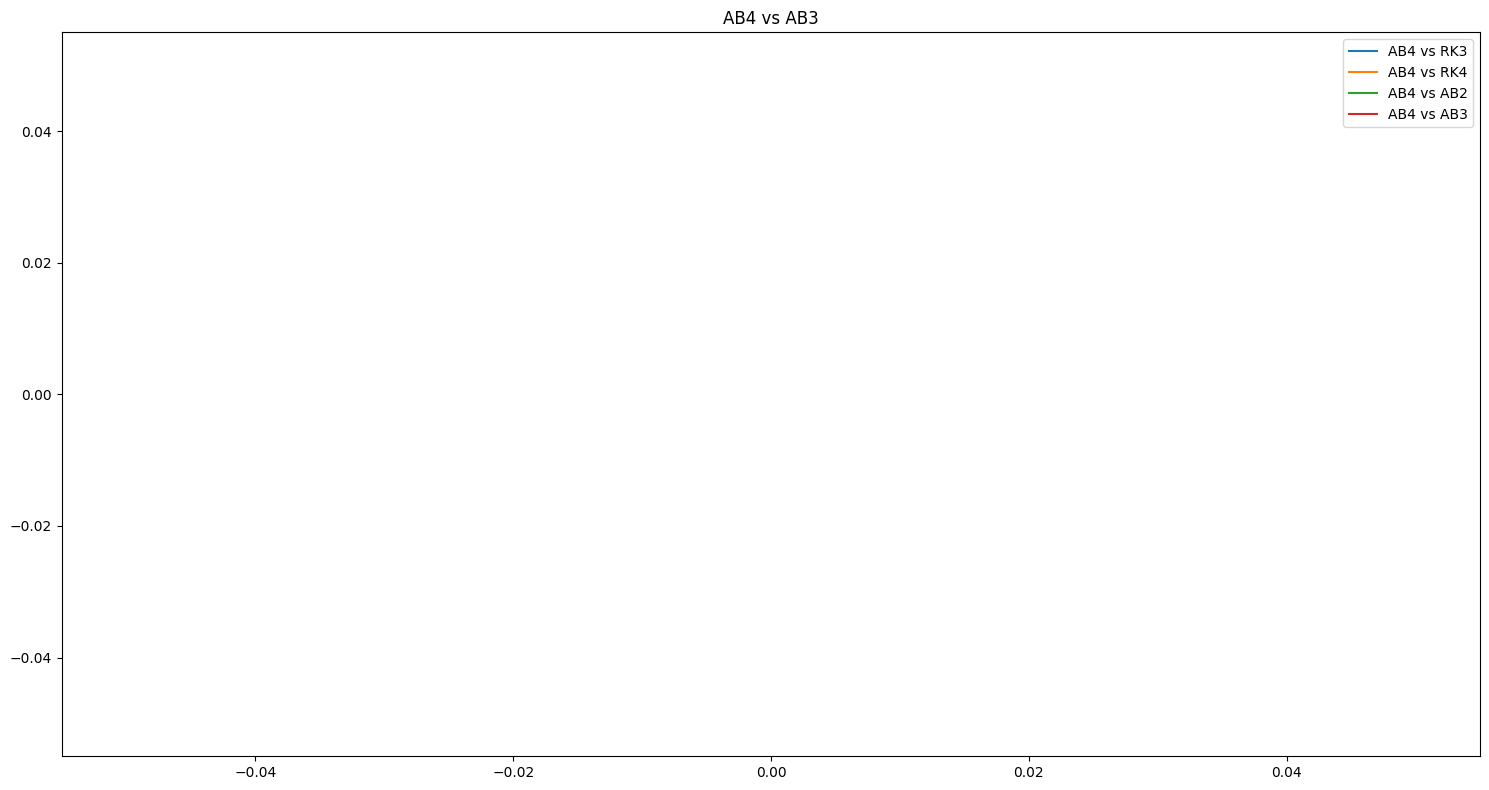

In [44]:
# Plotagem
plt.figure(figsize=(15, 8))
methods = {
    "AB4 vs RK3": errors_rk3,
    "AB4 vs RK4": errors_rk4,
    "AB4 vs AB2": errors_ab2,
    "AB4 vs AB3": errors_ab3,
}

for name, y in methods.items():
    plt.plot(steps, y, label=name)
    plt.title(name)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()